In [1]:
import numpy as np
from matplotlib import pyplot as plt

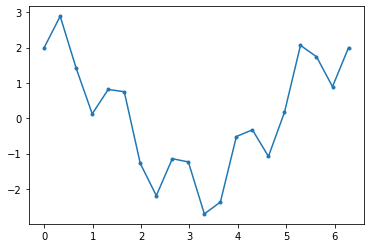

In [2]:
# make simulated data
x0 = 0
x1 = 2*np.pi

xvec, dx = np.linspace(0, x1, 20, retstep=True)
#yvec = np.sin(x)+0.5*x
yvec = 2*np.cos(xvec) + np.sin(5*xvec)
plt.plot(xvec, yvec, '.-')
plt.show()

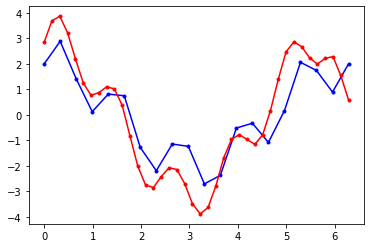

In [18]:
def gauss(x):
    # y is the measured data we want to fit to
    rtn = np.zeros_like(x)
    c = 5
    n = len(yvec)
    for i in range(n):
        rtn += (yvec[i]*np.exp(-(x - i*(x1-x0)/n)**2 / 2*c**2))
    return rtn

newx = np.linspace(x0, x1, 40)
prdc = gauss(newx)

plt.plot(xvec, yvec, 'b.-')
#print(np.sum(0.5*(y-g)**2))
plt.plot(newx, prdc, 'r.-')
plt.show()

[-6.40591724e-01  9.59156447e+00 -2.13413011e+01  5.89953724e+01
 -1.37449886e+02  2.82631247e+02 -5.05567570e+02  7.94038414e+02
 -1.10210712e+03  1.33771256e+03 -1.42891434e+03  1.33561593e+03
 -1.10212591e+03  7.96123298e+02 -5.05537362e+02  2.80564914e+02
 -1.37478538e+02  6.10357778e+01 -2.12859273e+01  7.39035489e+00]


/Users/minotaur/Library/Python/3.8/lib/python/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


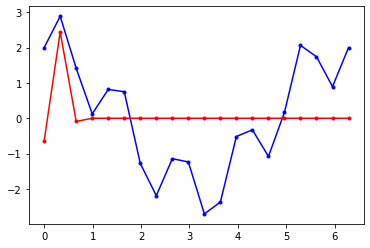

In [16]:
from scipy.optimize import curve_fit as cf
def wgauss(x, *w):
    rtn = np.zeros_like(x)
    c = 5
    n = len(w)
    for i in range(n):
        rtn += (w[i]*np.exp(-(x - i*(x1-x0)/n)**2 / 2*c**2))
    return rtn

#sol = cf(wgauss, xvec, yvec, p0=np.ones(len(yvec)))
sol = cf(wgauss, xvec, yvec, p0=yvec)
print(sol[0])

plt.plot(xvec, yvec, 'b.-')
plt.plot(xvec, wgauss(xvec, sol[0]), 'r.-')
plt.show()

**What I Really Want**

Let $v$ be a vector of sampled data of some arbitrary function $f(x)$ and $a$ the vector of coefficients representing the function in the Gaussian basis. I want a matrix $A$ that has the following action
$$
A v = a
$$
and similarly a matrix $B$ that
$$
v = a B
$$
Further I would assume that the relationship between these matrices would be $ B A = \mathbb{I} $ so that
$$
B A v = v
$$